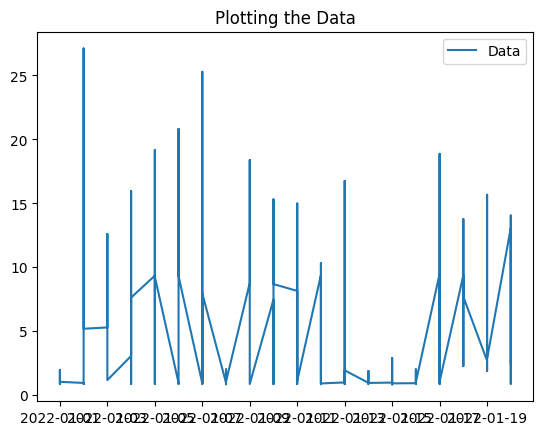

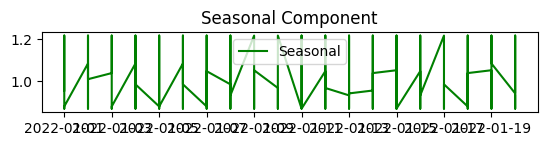

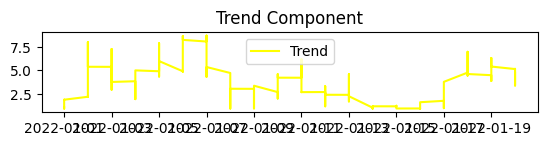

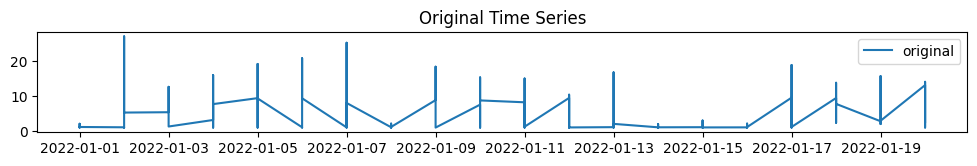

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the Passenger Details
# Replace 'AirPassengers.csv' with the path to your data file
data = pd.read_csv('/content/KwhConsumptionBlower78_1.csv')
data.head()

# Ensure that the 'TxnDate' column is in datetime format
data['TxnDate'] = pd.to_datetime(data['TxnDate'], errors='coerce')

# Check for and remove any rows where 'TxnDate' couldn't be parsed correctly
data = data.dropna(subset=['TxnDate'])

# Set the 'TxnDate' column as the index
data.set_index('TxnDate', inplace=True)

# Ensure 'Consumption' is numeric
data['Consumption'] = pd.to_numeric(data['Consumption'], errors='coerce')

# Drop any rows where 'Consumption' is NaN
data = data.dropna(subset=['Consumption'])

# Plotting the Data
plt.plot(data['Consumption'], label='Data')
plt.title('Plotting the Data')
plt.legend()
plt.show()

# Perform time series decomposition
period = 13
result = seasonal_decompose(data['Consumption'], model='multiplicative', period=period)

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend()
plt.show()

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='yellow')
plt.title('Trend Component')
plt.legend()
plt.show()

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.subplot(4, 1, 1)
plt.plot(data['Consumption'], label='original')
plt.title('Original Time Series')
plt.legend()
plt.show()
